<a href="https://colab.research.google.com/github/Azmain173/Digit-Recognizer/blob/main/Digit_Recognizer_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [3]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (42000, 785)
Test Data Shape: (28000, 784)


Understanding the Dataset Shape (42000, 785) and (28000, 784)
📌 1️⃣ Train Data: (42000, 785)
42,000 images → Each row represents one image of a handwritten digit (0-9).
785 columns → The first column is the label (the actual digit), and the remaining 784 columns contain pixel values.
Each image is 28×28 pixels → Since 28 × 28 = 784, each image is represented as a row of 784 pixel intensity values (grayscale).

📌 2️⃣ Test Data: (28000, 784)
28,000 images → Each row represents one image of a handwritten digit.
784 columns → No label column since this is the test dataset used for predictions.
The format is the same as train data, except it does not have the first label column

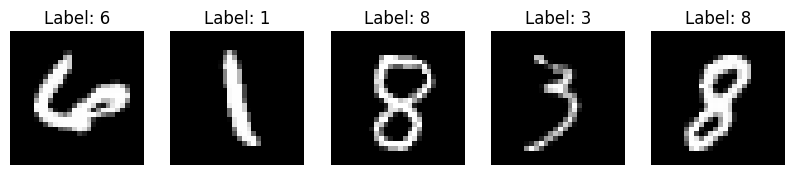

In [4]:
# Visualizing a few random images from the train dataset
def visualize_images(data, num_images=5):
    # Pick random sample indices
    random_indices = np.random.choice(data.index, num_images, replace=False)

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(random_indices):
        image = data.iloc[idx, 1:].values.reshape(28, 28)  # Get the pixel values and reshape to 28x28
        label = data.iloc[idx, 0]  # The label for the image
        plt.subplot(1, num_images, i+1)  # Plot in a row with num_images columns
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

# Visualize 5 random images from the train dataset
visualize_images(train_data, num_images=5)


What Happens Here?
The function visualize_images randomly picks 5 rows from the train_data.
It reshapes the 784 pixel values into a 28×28 grid to display the image.
Each image is displayed with its corresponding label.


In [5]:
# Scaling the pixel values (from 0-255 to 0-1)
X_train = train_data.drop("label", axis=1).values / 255.0  # Drop the label column and normalize
y_train = train_data["label"].values  # The label column for training

# Scaling the test data (no need to normalize labels in test data)
X_test = test_data.values / 255.0  # Only scale the pixel values

# Check the shape of the data after scaling
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Training Data Shape: (42000, 784)
Test Data Shape: (28000, 784)


 Data Preprocessing
Before feeding the data into a machine learning model (like CNN), we need to prepare it by:

Scaling the Pixel Values: Pixel values range from 0 to 255, but for deep learning models, we generally scale them to a range between 0 and 1 to improve model performance.
Splitting the Data: Although we have the training data with labels, we should also create a validation set to evaluate our model's performance during training.
1️⃣ Scale the Pixel Values (0 to 1)
We'll normalize the pixel values by dividing by 255 (since they range from 0 to 255).

Split the Training Data into Train & Validation Sets
We will use scikit-learn's train_test_split function to create a validation set.

In [6]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shape after the split
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)


Training Data Shape: (33600, 784)
Validation Data Shape: (8400, 784)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
# Build the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 28x28 images with 1 color channel (grayscale)
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Output Layer (10 classes for digits 0-9)
    layers.Dense(10, activation='softmax')
])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])


In [10]:
# Reshape the data to match the model's input shape (28x28x1)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_val_reshaped = X_val.reshape(-1, 28, 28, 1)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val))


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.8233 - loss: 0.5695 - val_accuracy: 0.9744 - val_loss: 0.0821
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 61ms/step - accuracy: 0.9774 - loss: 0.0732 - val_accuracy: 0.9793 - val_loss: 0.0652
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - accuracy: 0.9843 - loss: 0.0470 - val_accuracy: 0.9838 - val_loss: 0.0488
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9867 - val_loss: 0.0458
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.9917 - loss: 0.0280 - val_accuracy: 0.9851 - val_loss: 0.0481
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9879 - val_loss: 0.0377
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9944 - loss: 0.0197 - val_accuracy: 0.9867 - val_loss: 0.0446
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.9948 - loss: 0.0167 - 

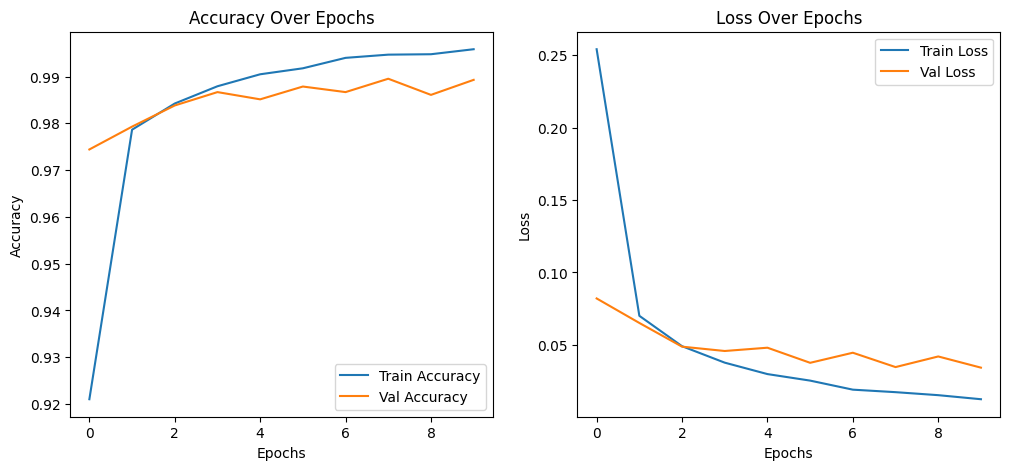

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_reshaped, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9889 - loss: 0.0333
Validation Loss: 0.034335702657699585
Validation Accuracy: 0.9892857074737549


In [13]:
# Reshape the test data to match the model's input shape (28x28x1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Make predictions on the test data
predictions = model.predict(X_test_reshaped)

# Get the predicted labels (highest probability class)
predicted_labels = np.argmax(predictions, axis=1)

# Display the first few predicted labels
print("Predicted labels for the first few test images:", predicted_labels[:10])


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step
Predicted labels for the first few test images: [2 0 9 0 3 7 0 3 0 3]


In [14]:
# Save the predictions in a CSV file for Kaggle submission
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)
print("Predictions saved as submission.csv")


Predictions saved as submission.csv


263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


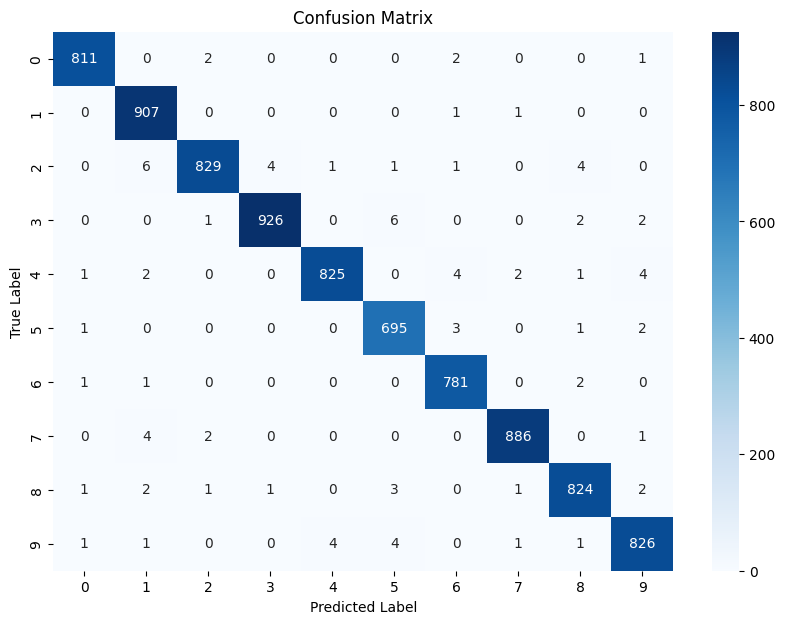

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on the validation set
val_predictions = model.predict(X_val_reshaped)
val_pred_labels = np.argmax(val_predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_val, val_pred_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


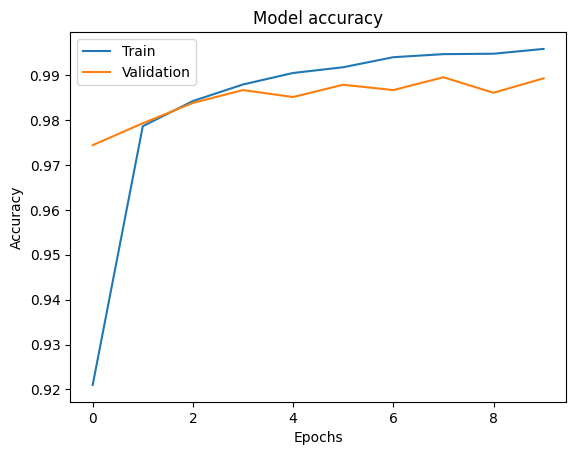

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
# Get predictions on the validation set
val_predictions = model.predict(X_val_reshaped)
# Get the predicted labels (the class with the highest probability)
val_pred_labels = np.argmax(val_predictions, axis=1)


263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


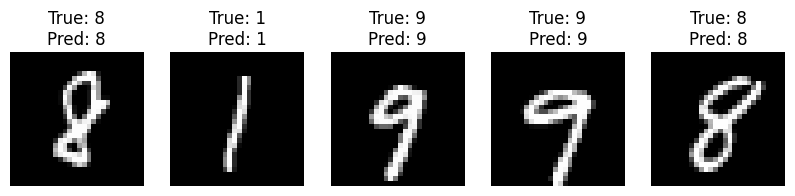

In [19]:
import matplotlib.pyplot as plt

def display_predictions(X, y_true, y_pred, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        image = X[i].reshape(28, 28)  # Reshape the image to 28x28
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

# Display first 5 images with true and predicted labels
display_predictions(X_val[:5], y_val[:5], val_pred_labels[:5])


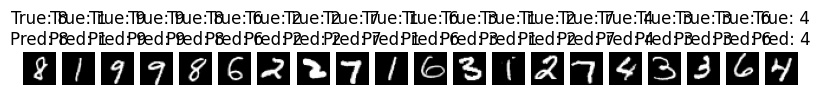

In [20]:
# Display first 20 images with their true and predicted labels
display_predictions(X_val[:20], y_val[:20], val_pred_labels[:20], num_images=20)


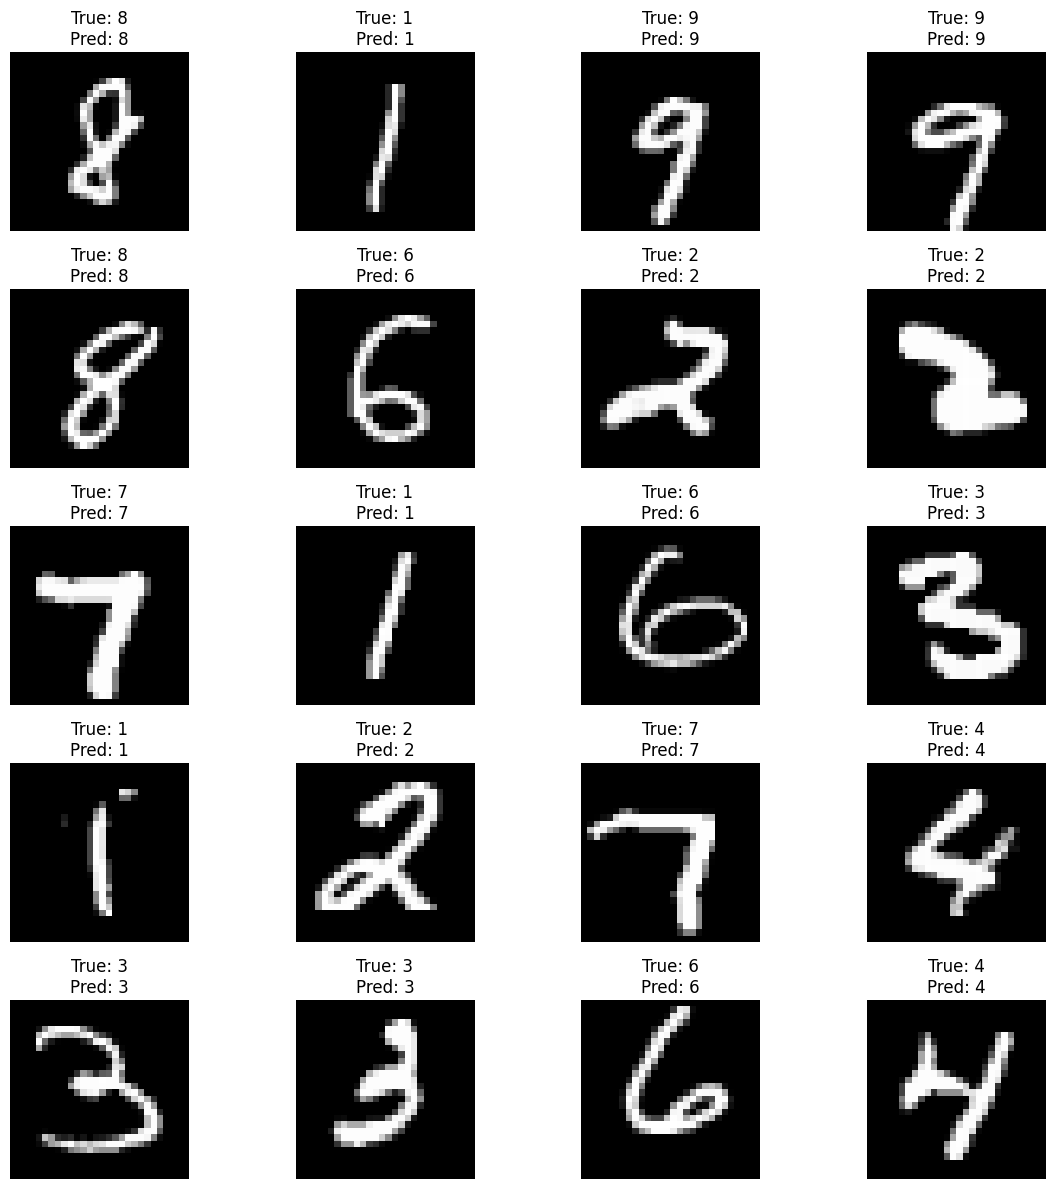

In [21]:
import matplotlib.pyplot as plt

def display_predictions(X, y_true, y_pred, num_images=20):
    # Calculate grid size (e.g., 5x4 grid for 20 images)
    grid_size = (5, 4)  # Adjust this based on the number of images you want to display
    plt.figure(figsize=(12, 12))  # Increase figure size to zoom in

    for i in range(num_images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        image = X[i].reshape(28, 28)  # Reshape to 28x28 image
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')  # Hide axis for better view

    plt.tight_layout()  # Make sure everything fits without overlap
    plt.show()

# Display first 20 images with true and predicted labels
display_predictions(X_val[:20], y_val[:20], val_pred_labels[:20], num_images=20)
